<a href="https://colab.research.google.com/github/ClaudixoPG/ESI_2025_S1/blob/main/notebooks/regresion_multiple_ux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal Múltiple: Usabilidad y Jugabilidad → Satisfacción
Este notebook analiza si los puntajes de usabilidad y jugabilidad pueden predecir la satisfacción del usuario en un videojuego o software interactivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")


In [2]:
# Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/ClaudixoPG/ESI_2025_S1/main/datasets/dataset_regresion_multiple_ux.xlsx"
df = pd.read_excel(url)
df.head()


,user_id,usability_score,gameplay_score,satisfaction_score
0,user_1,80.0,64.2,68.9
1,user_2,73.6,67.8,57.9
2,user_3,81.5,56.7,69.4
3,user_4,90.2,55.6,55.5
4,user_5,72.7,79.8,72.5


In [3]:
# Preparar datos
X = df[["usability_score", "gameplay_score"]]
y = df["satisfaction_score"]

# Entrenar modelo
model = LinearRegression()
model.fit(X, y)

# Coeficientes
print("Coeficientes del modelo:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"- {feature}: {coef:.3f}")
print(f"Intercepto: {model.intercept_:.3f}")
print(f"R^2 Score: {model.score(X, y):.3f}")


Coeficientes del modelo:
- usability_score: 0.461
- gameplay_score: 0.627
Intercepto: -12.829
R^2 Score: 0.686


**Interpretación:**
- El modelo estima cuánto contribuye cada variable (usabilidad y jugabilidad) a la satisfacción.
- Un coeficiente positivo indica una relación directa.
- El R² muestra qué tan bien el modelo explica la variación en la satisfacción.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


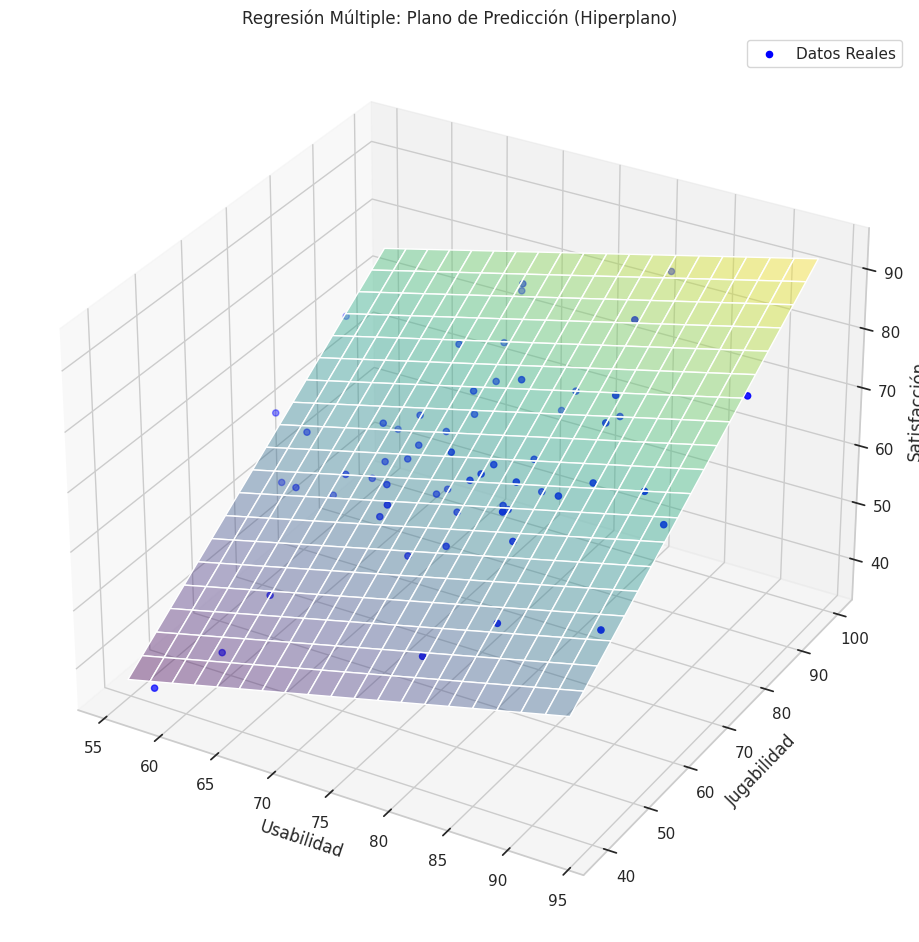

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np

# Preparar datos
X = df[["usability_score", "gameplay_score"]].values
y = df["satisfaction_score"].values

# Crear malla para predicción
us_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
gp_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
us_grid, gp_grid = np.meshgrid(us_range, gp_range)
X_grid = np.c_[us_grid.ravel(), gp_grid.ravel()]
y_pred_grid = model.predict(X_grid).reshape(us_grid.shape)

# Graficar
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

# Puntos reales
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Datos Reales')

# Superficie de predicción
ax.plot_surface(us_grid, gp_grid, y_pred_grid, alpha=0.4, cmap='viridis')

ax.set_xlabel('Usabilidad')
ax.set_ylabel('Jugabilidad')
ax.set_zlabel('Satisfacción')
ax.set_title('Regresión Múltiple: Plano de Predicción (Hiperplano)')

plt.legend()
#plt.tight_layout()
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.show()
